In [37]:
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset('/Users/annadugoul/Documents/ERA5/3moisture')
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    p71.162    (time, latitude, longitude) float32 ...
    p72.162    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-28 16:42:34 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [38]:
dataset = dataset.rename({'p71.162':'east', 'p72.162':'north'})
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    east       (time, latitude, longitude) float32 ...
    north      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-28 16:42:34 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [39]:
import xarray.ufuncs as xu
dataset['flux'] = xu.sqrt(dataset.east**2+dataset.north**2)
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    east       (time, latitude, longitude) float32 110.3 112.4 ... 76.13 61.41
    north      (time, latitude, longitude) float32 10.78 11.08 ... 187.0 180.5
    flux       (time, latitude, longitude) float32 110.8 112.9 ... 201.9 190.7
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-28 16:42:34 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [ ]:
data

In [40]:
dataarray_east = dataset.east.resample(time='1D').interpolate('linear')
dataarray_east

<xarray.DataArray 'east' (time: 5936, latitude: 101, longitude: 181)>
array([[[ 1.10318787e+02,  1.12377411e+02,  1.13812225e+02, ...,
          1.56222992e+01,  1.48737183e+01,  1.49984741e+01],
        [ 1.00462372e+02,  1.01023819e+02,  1.02021942e+02, ...,
          1.53103943e+01,  1.41875000e+01,  1.41251221e+01],
        [ 8.62391968e+01,  8.64263306e+01,  8.66134796e+01, ...,
          1.49360962e+01,  1.33765259e+01,  1.30646210e+01],
        ...,
        [ 1.58041351e+02,  1.57479889e+02,  1.58290863e+02, ...,
          4.23852783e+02,  4.46248108e+02,  4.53983521e+02],
        [ 1.52925995e+02,  1.52426941e+02,  1.53736969e+02, ...,
          4.88730530e+02,  4.92722961e+02,  4.80121704e+02],
        [ 1.48247314e+02,  1.49307800e+02,  1.50493073e+02, ...,
          5.71761475e+02,  5.52048645e+02,  5.22416992e+02]],

       [[ 1.60411865e+02,  1.50555450e+02,  1.45065796e+02, ...,
          6.83978271e+01,  6.01633453e+01,  5.35508118e+01],
        [ 1.56294647e+02,  1.53799347e+02,  1.49869263e+02, ...,
          6.40310516e+01,  5.56094208e+01,  4.93088074e+01],
        [ 1.56294647e+02,  1.54485535e+02,  1.54236023e+02, ...,
          5.85413971e+01,  5.04316864e+01,  4.48172607e+01],
...
        [ 3.38950348e+02,  3.34458801e+02,  3.33273529e+02, ...,
          2.78564148e+02,  2.83492371e+02,  2.88794891e+02],
        [ 3.46997681e+02,  3.40697052e+02,  3.33834991e+02, ...,
          2.74384552e+02,  2.80560394e+02,  2.85051941e+02],
        [ 3.56916473e+02,  3.48245331e+02,  3.40260376e+02, ...,
          2.73947876e+02,  2.79499908e+02,  2.82993317e+02]],

       [[-7.17754593e+01, -6.90306320e+01, -6.69096298e+01, ...,
         -1.15856934e+00,  8.90808105e-02, -6.59515381e-01],
        [-7.75146408e+01, -7.77641678e+01, -7.60174637e+01, ...,
         -4.52722168e+00, -4.02815247e+00, -5.27580261e+00],
        [-8.21309357e+01, -8.28795319e+01, -8.33785858e+01, ...,
         -1.08902283e+01, -1.07654572e+01, -1.16388092e+01],
        ...,
        [ 3.71139648e+02,  3.67209595e+02,  3.66585754e+02, ...,
          1.65090546e+02,  1.64591492e+02,  1.60474274e+02],
        [ 3.65088562e+02,  3.61096100e+02,  3.59099854e+02, ...,
          1.49245422e+02,  1.45876770e+02,  1.39389008e+02],
        [ 3.59099854e+02,  3.56854095e+02,  3.54733093e+02, ...,
          1.33462677e+02,  1.27224426e+02,  1.18740417e+02]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:      kg m**-1 s**-1
    long_name:  Vertical integral of eastward water vapour flux

In [41]:
dataarray_north = dataset.north.resample(time='1D').interpolate('linear')
dataarray_north

<xarray.DataArray 'north' (time: 5936, latitude: 101, longitude: 181)>
array([[[ 1.07775269e+01,  1.10816345e+01,  1.07775269e+01, ...,
         -9.11006470e+01, -9.03099365e+01, -9.28036804e+01],
        [ 1.48526611e+01,  1.28455200e+01,  1.16290588e+01, ...,
         -9.52973938e+01, -9.37768250e+01, -9.58448181e+01],
        [ 1.69206238e+01,  1.45485535e+01,  1.13857727e+01, ...,
         -1.00710632e+02, -9.73653870e+01, -9.80952454e+01],
        ...,
        [-8.72079773e+01, -8.98233643e+01, -9.31077881e+01, ...,
          1.37775513e+02,  1.57786209e+02,  1.66118942e+02],
        [-9.26820374e+01, -9.51149292e+01, -9.79127808e+01, ...,
          1.61861343e+02,  1.80655579e+02,  1.91177933e+02],
        [-9.78519592e+01, -1.01318878e+02, -1.04055878e+02, ...,
          1.85278122e+02,  2.01943558e+02,  2.13378235e+02]],

       [[ 1.30720078e+02,  1.17217422e+02,  1.05843552e+02, ...,
         -5.27822876e+01, -4.40846252e+01, -3.69075317e+01],
        [ 1.34977676e+02,  1.23907928e+02,  1.13263931e+02, ...,
         -5.72223511e+01, -4.71257629e+01, -3.97053833e+01],
        [ 1.42276398e+02,  1.31510773e+02,  1.23178055e+02, ...,
         -6.39736633e+01, -5.05926514e+01, -4.16517029e+01],
...
        [ 9.86520386e+00,  3.96539307e+00, -1.50866699e+00, ...,
          6.64987427e+02,  6.57141296e+02,  6.52640381e+02],
        [ 9.98684692e+00,  4.02621460e+00, -1.75195312e+00, ...,
          6.64318359e+02,  6.55316650e+02,  6.47896240e+02],
        [ 7.43228149e+00,  1.53247070e+00, -4.48898315e+00, ...,
          6.66568848e+02,  6.55803223e+02,  6.46740601e+02]],

       [[-3.16159363e+01, -3.09468994e+01, -3.05819702e+01, ...,
         -1.44784546e+00, -1.81277466e+00, -2.96841431e+00],
        [-2.93655090e+01, -2.91830444e+01, -2.91830444e+01, ...,
         -5.96313477e-01, -1.44784546e+00, -3.57662964e+00],
        [-3.03386841e+01, -3.02170105e+01, -3.03386841e+01, ...,
         -3.53027344e-01, -2.72512817e+00, -5.94873047e+00],
        ...,
        [ 1.04140518e+02,  9.70242462e+01,  8.85090637e+01, ...,
          4.35563904e+02,  4.22061218e+02,  4.05274139e+02],
        [ 1.01525131e+02,  9.44088745e+01,  8.64410858e+01, ...,
          4.32887695e+02,  4.16891296e+02,  3.97914581e+02],
        [ 9.81798859e+01,  9.14285583e+01,  8.35215912e+01, ...,
          4.29785736e+02,  4.11782166e+02,  3.90919952e+02]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:      kg m**-1 s**-1
    long_name:  Vertical integral of northward water vapour flux

In [42]:
dataarray_flux = dataset.flux.resample(time='1D').interpolate('linear')
dataarray_flux

<xarray.DataArray 'flux' (time: 5936, latitude: 101, longitude: 181)>
array([[[110.84398651, 112.92247772, 114.32138062, ...,  92.43043518,
          91.52656555,  94.00785828],
        [101.55436707, 101.83721924, 102.68257904, ...,  96.5194397 ,
          94.84396362,  96.88007355],
        [ 87.88348389,  87.64228821,  87.35863495, ..., 101.81217194,
          98.27996063,  98.96141052],
        ...,
        [180.50567627, 181.29576111, 183.64382935, ..., 445.68295288,
         473.32214355, 483.42169189],
        [178.81924438, 179.66864014, 182.26895142, ..., 514.83648682,
         524.79748535, 516.78411865],
        [177.6295929 , 180.43927002, 182.96389771, ..., 601.03179932,
         587.82556152, 564.3135376 ]],

       [[206.92922974, 190.80583191, 179.57434082, ...,  86.3957901 ,
          74.58607483,  65.03733826],
        [206.51147461, 197.50294495, 187.8550415 , ...,  85.8741684 ,
          72.89201355,  63.30778885],
        [211.35418701, 202.88140869, 197.3868866 , ...,  86.71634674,
          71.43508911,  61.18375015],
...
        [339.09387207, 334.4822998 , 333.27694702, ..., 720.97589111,
         715.68334961, 713.68200684],
        [347.14135742, 340.72085571, 333.83959961, ..., 718.75292969,
         712.84924316, 707.83056641],
        [356.99383545, 348.24871826, 340.28997803, ..., 720.6673584 ,
         712.88012695, 705.94519043]],

       [[ 78.43012238,  75.65010834,  73.56735229, ...,   1.85433006,
           1.81496191,   3.04079652],
        [ 82.89060211,  83.05970764,  81.42668152, ...,   4.56632519,
           4.28045225,   6.37388229],
        [ 87.55527496,  88.21612549,  88.72668457, ...,  10.89594841,
          11.10501671,  13.07093239],
        ...,
        [385.47360229, 379.81124878, 377.11929321, ..., 465.80126953,
         453.01879883, 435.8888855 ],
        [378.94195557, 373.23373413, 369.35723877, ..., 457.89294434,
         441.67678833, 421.62225342],
        [372.27947998, 368.38027954, 364.43301392, ..., 450.03118896,
         430.98791504, 408.55560303]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31

In [43]:
surface_pressure = xr.open_dataset('/Users/annadugoul/Documents/ERA5/3sp')
dataarray_sp = surface_pressure.sp.resample(time='1D').interpolate('linear')
dataset_sp = dataarray_sp.to_dataset(name='sp')
sp_hPa = dataset_sp.sp / 100

In [44]:
mdata_east = dataarray_east.where(sp_hPa>=500)

In [45]:
mdata_north = dataarray_north.where(sp_hPa>=500)

In [46]:
mdata_flux = dataarray_flux.where(sp_hPa>=500)

In [47]:
t_east = mdata_east.sel(time=slice('2013-7-4', '2013-7-9'))
t_east

<xarray.DataArray 'east' (time: 6, latitude: 101, longitude: 181)>
array([[[ 185.24008179,  187.73538208,  189.10778809, ...,
           60.22572327,   63.40722656,   75.01036072],
        [ 169.3949585 ,  169.14541626,  169.89401245, ...,
           66.15205383,   66.65110779,   76.94421387],
        [ 145.81439209,  145.25296021,  145.19058228, ...,
          108.19779968,   97.5927887 ,   92.41505432],
        ...,
        [ 385.98669434,  386.23620605,  387.67102051, ...,
          -91.48829651, -106.14816284, -122.67950439],
        [ 410.93963623,  413.1854248 ,  416.67883301, ...,
         -103.65287018, -115.94220734, -131.10113525],
        [ 427.09667969,  431.83776855,  437.01550293, ...,
         -114.81932068, -125.67385864, -139.64752197]],

       [[ 116.55703735,  117.4303894 ,  118.98995972, ...,
           62.78340149,   60.03857422,   57.79281616],
        [ 103.33197021,  105.32820129,  107.44920349, ...,
           53.48841858,   51.55456543,   49.99501038],
        [  94.28651428,   96.34513855,  100.15046692, ...,
           45.62823486,   43.00817871,   41.57337952],
...
        [ 216.74319458,  213.31216431,  212.00213623, ...,
          -65.78674316,  -75.14411163,  -85.06291199],
        [ 238.51464844,  235.14599609,  232.46356201, ...,
          -76.70366669,  -83.50335693,  -91.1763916 ],
        [ 262.65664673,  260.16134644,  257.10461426, ...,
          -85.25006104,  -90.61494446,  -96.41651154]],

       [[   6.76399231,    6.4520874 ,    3.33296204, ...,
          116.74420166,  121.6723938 ,  124.16769409],
        [   4.33108521,    0.83766174,   -4.02815247, ...,
          122.04669189,  125.165802  ,  126.72537231],
        [  -4.46484375,   -8.08302307,  -11.57643127, ...,
          109.07115173,  111.25454712,  112.62695312],
        ...,
        [ 335.58169556,  329.03152466,  323.16757202, ...,
          -88.61871338,  -94.29550934, -102.40522766],
        [ 350.5534668 ,  344.06570435,  337.51553345, ...,
          -90.80209351,  -93.9835968 ,  -99.90992737],
        [ 357.66506958,  355.16976929,  349.18106079, ...,
          -93.23500824,  -95.10647583,  -99.16133118]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09
Attributes:
    units:      kg m**-1 s**-1
    long_name:  Vertical integral of eastward water vapour flux

In [48]:
t_north = mdata_north.sel(time=slice('2013-7-4', '2013-7-9'))
t_north

<xarray.DataArray 'north' (time: 6, latitude: 101, longitude: 181)>
array([[[   7.43228149,   12.23727417,   16.49487305, ...,
         -108.25265503, -110.19900513, -122.24191284],
        [  11.26412964,   15.03512573,   18.62368774, ...,
         -103.02191162, -101.13638306, -110.32064819],
        [  11.68988037,   15.521698  ,   19.59683228, ...,
         -108.13101196, -101.31887817,  -98.46020508],
        ...,
        [ -54.24203491,  -70.11676025,  -81.79473877, ...,
           98.17988586,   86.25862122,   83.33912659],
        [ -48.40304565,  -63.85202026,  -76.19906616, ...,
           88.44824219,   75.37133789,   71.90444946],
        [ -40.92184448,  -57.16152954,  -71.81982422, ...,
           79.93304443,   66.00463867,   61.01715088]],

       [[ -26.87176514,  -22.37088013,  -17.86999512, ...,
         -108.67843628, -110.07733154, -110.86804199],
        [ -21.21524048,  -16.83599854,  -12.76089478, ...,
         -104.7857666 , -105.75894165, -106.48880005],
        [ -16.5927124 ,  -12.09182739,   -7.16519165, ...,
         -102.53530884, -102.29202271, -102.59613037],
...
        [ 113.99380493,  105.90437317,   96.78096008, ...,
          182.78437805,  168.6126709 ,  156.20481873],
        [ 112.83818054,  105.17449951,   97.45001221, ...,
          170.25488281,  156.38729858,  146.35153198],
        [ 112.65570068,  105.6002655 ,   97.99742126, ...,
          158.45526123,  145.92576599,  136.74153137]],

       [[ -15.31542969,   -9.0506897 ,   -6.61776733, ...,
          -44.99694824,  -45.36190796,  -47.00411987],
        [ -15.01132202,  -12.63925171,  -11.17950439, ...,
          -50.04525757,  -50.71429443,  -52.23486328],
        [ -19.2689209 ,  -17.26177979,  -16.775177  , ...,
          -54.66778564,  -53.02557373,  -52.47814941],
        ...,
        [ 192.4552002 ,  189.71818542,  184.85235596, ...,
           64.84899902,   45.93310547,   29.14602661],
        [ 186.5553894 ,  184.1224823 ,  181.32463074, ...,
           67.76849365,   49.09588623,   35.28912354],
        [ 180.53393555,  178.22267151,  175.91140747, ...,
           72.45184326,   54.26583862,   40.76318359]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09
Attributes:
    units:      kg m**-1 s**-1
    long_name:  Vertical integral of northward water vapour flux

In [49]:
t_flux = mdata_flux.sel(time=slice('2013-7-4', '2013-7-9'))
t_flux

<xarray.DataArray 'flux' (time: 6, latitude: 101, longitude: 181)>
array([[[185.38911438, 188.13378906, 189.82580566, ..., 123.87806702,
         127.1388855 , 143.42118835],
        [169.76905823, 169.81233215, 170.91172791, ..., 122.43206024,
         121.1236496 , 134.50300598],
        [146.28222656, 146.07992554, 146.50712585, ..., 152.96757507,
         140.6764679 , 135.03686523],
        ...,
        [389.77935791, 392.54907227, 396.20599365, ..., 134.19909668,
         136.77713013, 148.30937195],
        [413.78042603, 418.09002686, 423.58889771, ..., 136.26081848,
         138.2875061 , 149.52510071],
        [429.05264282, 435.60452271, 442.87768555, ..., 139.90270996,
         141.95256042, 152.39595032]],

       [[119.61452484, 119.54225922, 120.32434082, ..., 125.50999451,
         125.38600159, 125.02692413],
        [105.48735809, 106.66527557, 108.20430756, ..., 117.64806366,
         117.6555481 , 117.64083099],
        [ 95.73538971,  97.10096741, 100.40645599, ..., 112.2293396 ,
         110.9655838 , 110.69919586],
...
        [244.89222717, 238.15501404, 233.04818726, ..., 194.26277161,
         184.59921265, 177.86412048],
        [263.85922241, 257.59524536, 252.06311035, ..., 186.73558044,
         177.28451538, 172.4294281 ],
        [285.79681396, 280.77633667, 275.1477356 , ..., 179.93232727,
         171.7713623 , 167.31524658]],

       [[ 16.74258041,  11.11505413,   7.40968847, ..., 125.11568451,
         129.85328674, 132.76672363],
        [ 15.62363815,  12.66697884,  11.88306904, ..., 131.9087677 ,
         135.04968262, 137.06860352],
        [ 19.77943802,  19.06054306,  20.38186264, ..., 122.00444031,
         123.24481964, 124.25291443],
        ...,
        [386.85150146, 379.80880737, 372.30050659, ..., 109.81197357,
         104.88800812, 106.47216797],
        [397.10281372, 390.23364258, 383.13882446, ..., 113.30308533,
         106.03453064, 105.95903015],
        [400.64550781, 397.37750244, 390.98880005, ..., 118.07640076,
         109.4989624 , 107.21290588]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09

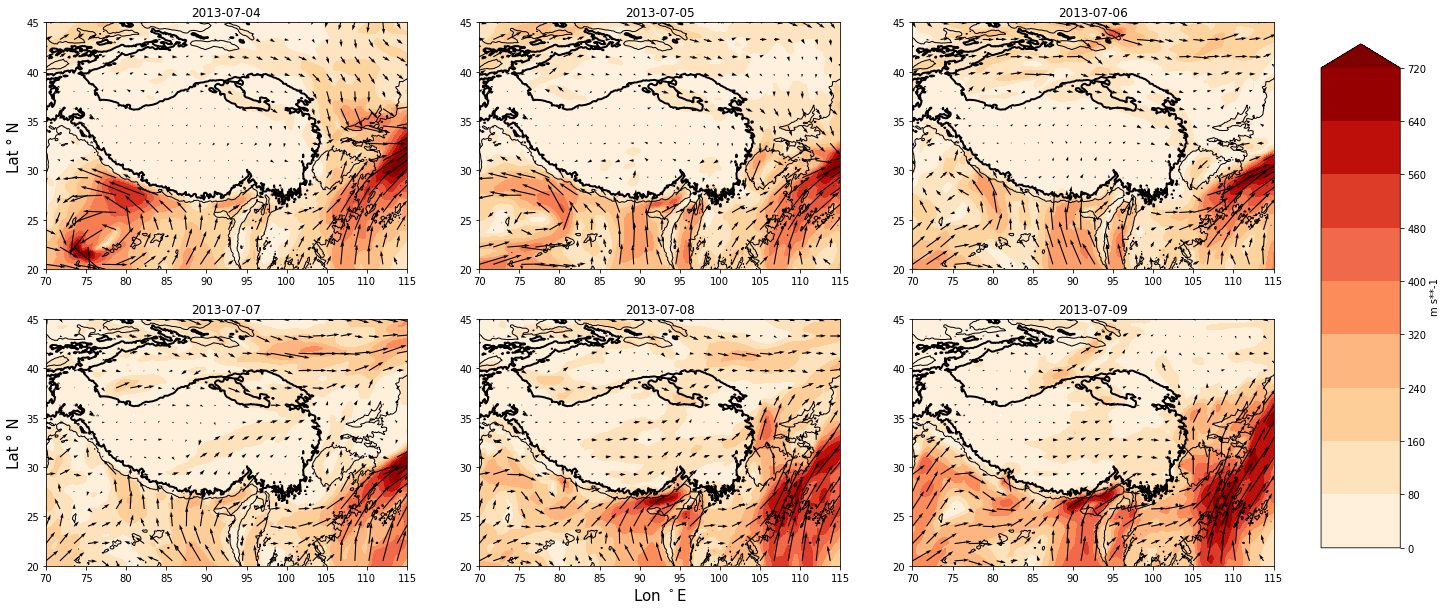

In [64]:
# Total wind speed
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

levels= 10
cmap=plt.cm.OrRd

m=ax1.contourf(t_flux.longitude,t_flux.latitude,t_flux[0], cmap=cmap,levels=levels, extend='max')
m=ax2.contourf(t_flux.longitude,t_flux.latitude,t_flux[1], cmap=cmap,levels=levels, extend='max')
m=ax3.contourf(t_flux.longitude,t_flux.latitude,t_flux[2], cmap=cmap,levels=levels, extend='max')
m=ax4.contourf(t_flux.longitude,t_flux.latitude,t_flux[3], cmap=cmap,levels=levels, extend='max')
m=ax5.contourf(t_flux.longitude,t_flux.latitude,t_flux[4], cmap=cmap,levels=levels, extend='max')
m=ax6.contourf(t_flux.longitude,t_flux.latitude,t_flux[5], cmap=cmap,levels=levels, extend='max')

sc=7

ax1.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[0])[::sc,::sc], (t_north[0])[::sc,::sc])
ax2.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[1])[::sc,::sc], (t_north[1])[::sc,::sc])
ax3.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[2])[::sc,::sc], (t_north[2])[::sc,::sc])
ax4.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[3])[::sc,::sc], (t_north[3])[::sc,::sc])
ax5.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[4])[::sc,::sc], (t_north[4])[::sc,::sc])
ax6.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[5])[::sc,::sc], (t_north[5])[::sc,::sc])
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
cbar = fig.colorbar(m,cax=cbar_ax, label=t_u.units)
ax1.set_title(str(t_u.time.values[0])[0:10])
ax2.set_title(str(t_u.time.values[1])[0:10])
ax3.set_title(str(t_u.time.values[2])[0:10])
ax4.set_title(str(t_u.time.values[3])[0:10])
ax5.set_title(str(t_u.time.values[4])[0:10])
ax6.set_title(str(t_u.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')

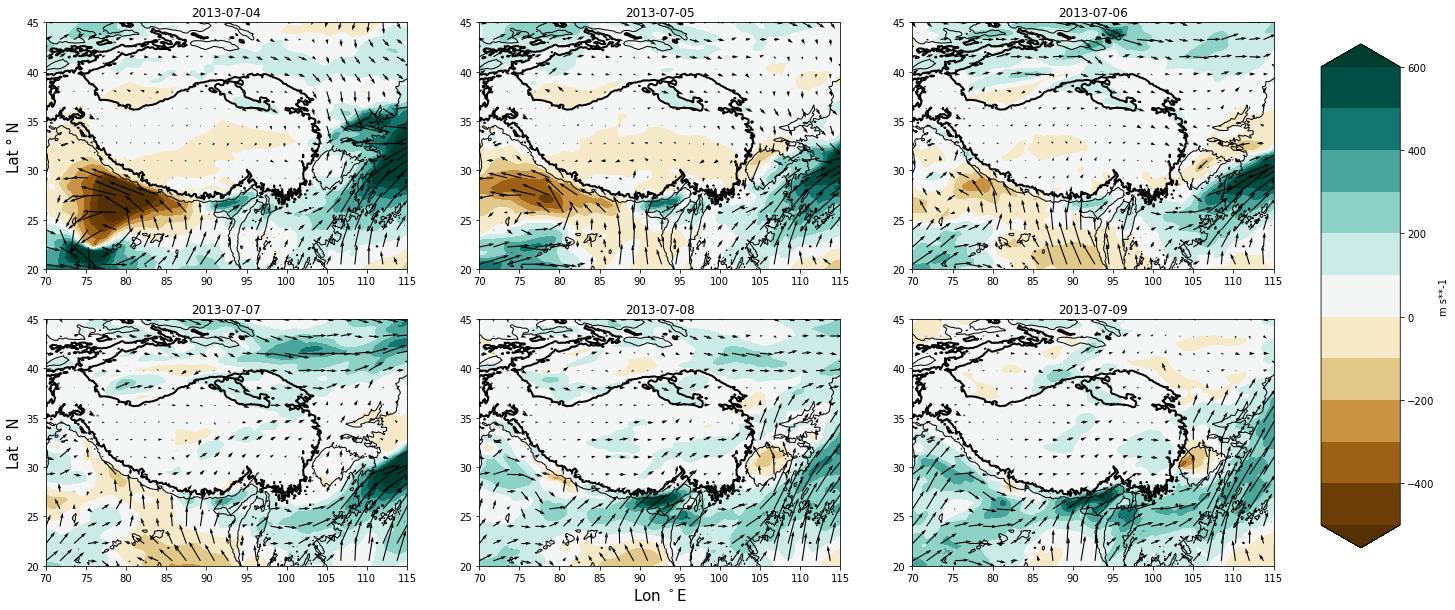

In [70]:
# east component speed
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

levels=[-500,-400,-300,-200,-100,0,100,200,300,400,500,600]
cmap=plt.cm.BrBG

m=ax1.contourf(t_east.longitude,t_east.latitude,t_east[0], cmap=cmap,levels=levels, extend='both')
m=ax2.contourf(t_east.longitude,t_east.latitude,t_east[1], cmap=cmap,levels=levels, extend='both')
m=ax3.contourf(t_east.longitude,t_east.latitude,t_east[2], cmap=cmap,levels=levels, extend='both')
m=ax4.contourf(t_east.longitude,t_east.latitude,t_east[3], cmap=cmap,levels=levels, extend='both')
m=ax5.contourf(t_east.longitude,t_east.latitude,t_east[4], cmap=cmap,levels=levels, extend='both')
m=ax6.contourf(t_east.longitude,t_east.latitude,t_east[5], cmap=cmap,levels=levels, extend='both')

sc=7

ax1.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[0])[::sc,::sc], (t_north[0])[::sc,::sc])
ax2.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[1])[::sc,::sc], (t_north[1])[::sc,::sc])
ax3.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[2])[::sc,::sc], (t_north[2])[::sc,::sc])
ax4.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[3])[::sc,::sc], (t_north[3])[::sc,::sc])
ax5.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[4])[::sc,::sc], (t_north[4])[::sc,::sc])
ax6.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[5])[::sc,::sc], (t_north[5])[::sc,::sc])
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
cbar = fig.colorbar(m,cax=cbar_ax, label=t_u.units)
ax1.set_title(str(t_u.time.values[0])[0:10])
ax2.set_title(str(t_u.time.values[1])[0:10])
ax3.set_title(str(t_u.time.values[2])[0:10])
ax4.set_title(str(t_u.time.values[3])[0:10])
ax5.set_title(str(t_u.time.values[4])[0:10])
ax6.set_title(str(t_u.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')

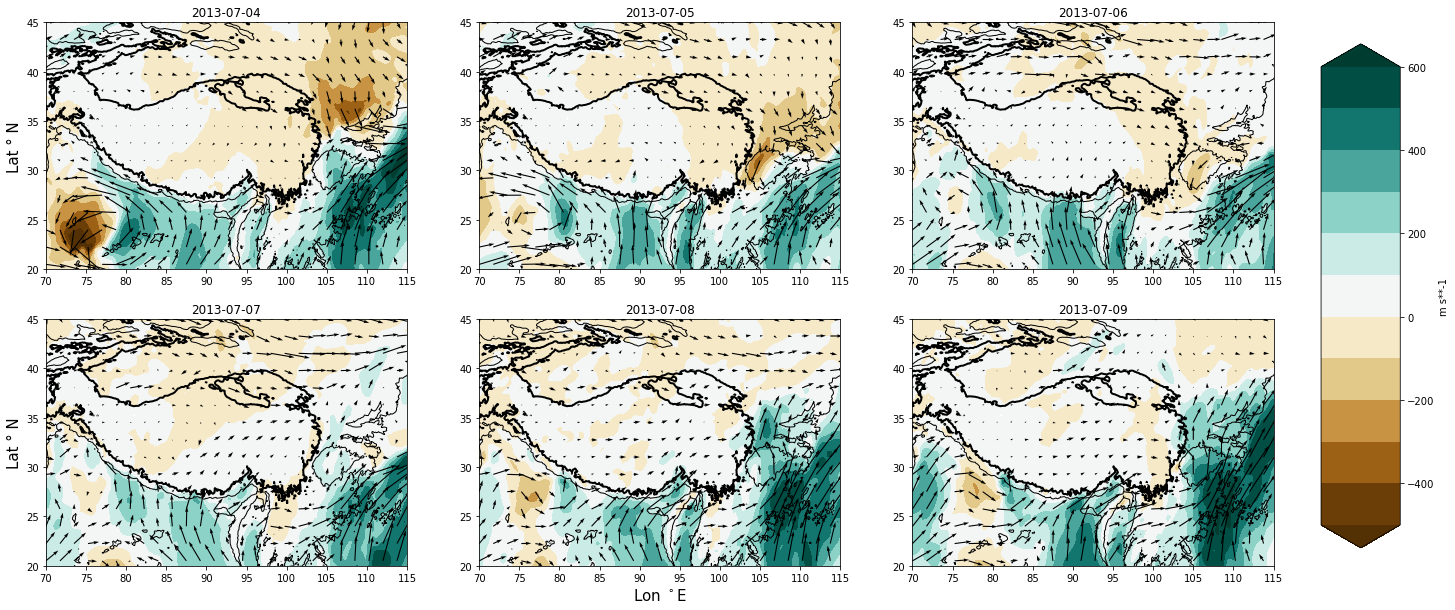

In [71]:
# north component speed
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

levels=[-500,-400,-300,-200,-100,0,100,200,300,400,500,600]
cmap=plt.cm.BrBG

m=ax1.contourf(t_north.longitude,t_north.latitude,t_north[0], cmap=cmap,levels=levels, extend='both')
m=ax2.contourf(t_north.longitude,t_north.latitude,t_north[1], cmap=cmap,levels=levels, extend='both')
m=ax3.contourf(t_north.longitude,t_north.latitude,t_north[2], cmap=cmap,levels=levels, extend='both')
m=ax4.contourf(t_north.longitude,t_north.latitude,t_north[3], cmap=cmap,levels=levels, extend='both')
m=ax5.contourf(t_north.longitude,t_north.latitude,t_north[4], cmap=cmap,levels=levels, extend='both')
m=ax6.contourf(t_north.longitude,t_north.latitude,t_north[5], cmap=cmap,levels=levels, extend='both')

sc=7

ax1.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[0])[::sc,::sc], (t_north[0])[::sc,::sc])
ax2.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[1])[::sc,::sc], (t_north[1])[::sc,::sc])
ax3.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[2])[::sc,::sc], (t_north[2])[::sc,::sc])
ax4.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[3])[::sc,::sc], (t_north[3])[::sc,::sc])
ax5.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[4])[::sc,::sc], (t_north[4])[::sc,::sc])
ax6.quiver(t_east.longitude[::sc], t_east.latitude[::sc], (t_east[5])[::sc,::sc], (t_north[5])[::sc,::sc])
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
cbar = fig.colorbar(m,cax=cbar_ax, label=t_u.units)
ax1.set_title(str(t_u.time.values[0])[0:10])
ax2.set_title(str(t_u.time.values[1])[0:10])
ax3.set_title(str(t_u.time.values[2])[0:10])
ax4.set_title(str(t_u.time.values[3])[0:10])
ax5.set_title(str(t_u.time.values[4])[0:10])
ax6.set_title(str(t_u.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')